# Make an example of NDVI

Use the Mato Grosso data as a good example of NDVI.

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functions import load_scene, composite

Load the pre-cropped scene.

In [2]:
matogrosso = load_scene(
    Path("../data/mato_grosso/LC08_L2SP_226068_20200804_20200915_02_T1_cropped/"),
    pattern="[2-5]",
)

Calculate NDVI

In [3]:
ndvi = (matogrosso[5] - matogrosso[4]) / ((matogrosso[5] + matogrosso[4]))

Plot RBG composite besides the NDVI

In [4]:
truecolor = composite(matogrosso, bands=[4, 3, 2], in_range=(6000, 15000))

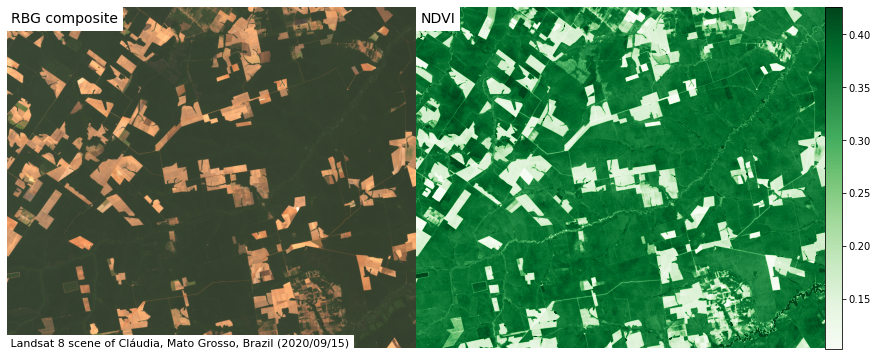

In [5]:
fig = plt.figure(figsize=(12, 4.75))

grid = GridSpec(1, 51, figure=fig, wspace=0, hspace=0)
axes =[
    fig.add_subplot(grid[0, 0:25]),
    fig.add_subplot(grid[0, 25:50]),
]
ax3 = fig.add_subplot(grid[0, 50])
ax1, ax2 = axes

ax1.imshow(truecolor)
ax1.text(
    30, 30, 
    f"RBG composite", 
    color="black", 
    fontweight="normal", 
    fontsize=14,
    verticalalignment="top",
    backgroundcolor="white",
)    

vmin, vmax = np.percentile(ndvi, (1, 99))
tmp = ax2.imshow(ndvi, cmap="Greens", vmin=vmin, vmax=vmax)
ax2.text(
    30, 30, 
    f"NDVI", 
    color="black", 
    fontweight="normal", 
    fontsize=14,
    verticalalignment="top",
    backgroundcolor="white",
)    

fig.colorbar(tmp, cax=ax3, pad=0)

for ax in axes:
    ax.axis("off")

fig.text(0, 0, 
    " Landsat 8 scene of Cláudia, Mato Grosso, Brazil (2020/09/15)", 
    color="black", 
    fontweight="normal", 
    fontsize=11,
    verticalalignment="bottom",
    backgroundcolor="white",
)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("../lectures/images/ndvi-mato-grosso.svg", bbox_inches="tight", pad_inches=0)